In [1]:
import numpy as np

def criaDatasetBidimensionalBinárioInclinado(n=20, slop=[2, 1], intercept=0.4, dummy_features=3):
    """
    Cria um dataset bidimensional binário com
    algumas características inúteis.
    """
    X = np.random.uniform(size=(n,dummy_features+2))
    AUX = np.multiply(X[:,:2], slop)-[0, intercept]
    y = np.array(AUX[:,0]>AUX[:,1], dtype=int)*2-1
    return X, y

slop = [2, 1]
intercept = -0.4
dummy_features = 3
Xtr, ytr = criaDatasetBidimensionalBinárioInclinado(n=20, slop=slop, intercept=intercept, dummy_features=dummy_features)
Xtr, ytr

(array([[0.3445343 , 0.61732586, 0.700523  , 0.25665736, 0.09571756],
        [0.00870816, 0.56225015, 0.75112547, 0.44092321, 0.60282278],
        [0.00999351, 0.38914895, 0.68895812, 0.75545036, 0.55570403],
        [0.02489972, 0.14233544, 0.79932973, 0.57087197, 0.50429294],
        [0.65286102, 0.33111557, 0.65638529, 0.24612379, 0.55303422],
        [0.67139746, 0.58683908, 0.984248  , 0.50440926, 0.80703047],
        [0.73659215, 0.46333451, 0.29420117, 0.01022658, 0.16227473],
        [0.5955491 , 0.96364425, 0.97678646, 0.87228222, 0.57565411],
        [0.813998  , 0.11610525, 0.19658144, 0.57881921, 0.67147589],
        [0.43375495, 0.46099254, 0.38352005, 0.35299603, 0.79330399],
        [0.06077684, 0.70060493, 0.77802512, 0.49975394, 0.4540684 ],
        [0.13140413, 0.98180816, 0.87577432, 0.51114192, 0.49013501],
        [0.51844685, 0.49814091, 0.15529009, 0.87298417, 0.68173735],
        [0.77316629, 0.51853283, 0.90545836, 0.00574988, 0.29996495],
        [0.75534041,

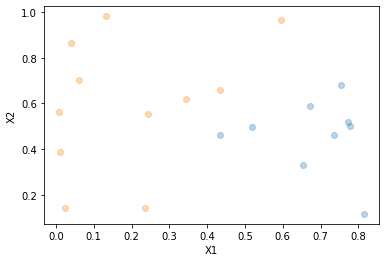

In [2]:
import matplotlib.pyplot as plt

def plotaDatasetBidimensional(X, y):
    """
    Plota um dataset bidimensional.
    """
    plt.xlabel('X1')
    plt.ylabel('X2')
    for k in set(y):
        plt.plot(X[:,0][y==k],X[:,1][y==k], "o", alpha=0.3)

plotaDatasetBidimensional(Xtr, ytr)

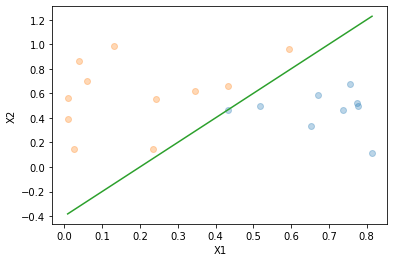

In [3]:
def plotaHiperplanoDatasetBidimensional(X, y, vetor, intercept=0):
    """
    Plota um dataset bidimensional com um hiperplano definido por um
    vetor e o valor em que este vetor intercepta o eixo vertical.
    """
    x0min = min(X[:,0])
    x0max = max(X[:,0])
    xs = np.linspace(x0min, x0max, num=2)
    ys = (-vetor[0] / vetor[1]) * xs - intercept / vetor[1]
    plotaDatasetBidimensional(X, y)
    plt.plot(xs,ys)

vetor_hyperplano = np.array(slop) * np.array([1, -1])
plotaHiperplanoDatasetBidimensional(Xtr, ytr, vetor_hyperplano, intercept)

In [4]:
def sign(a):
    return (a >= 0) * 2 - 1

In [5]:
def accuracy(yactual, ypred):
    return sum(yactual == ypred)/len(yactual)

In [6]:
from abc import ABC, abstractmethod

class TrainingAlgorithm(ABC):
    @abstractmethod
    def getW(self, X, y, activation):
        pass


class PseudoInversa(TrainingAlgorithm):
    def __init__(self, regularization=0):
        self.regularization = regularization
    def getW(self, X, y):
        if self.regularization == 0:
            return np.linalg.pinv(X) @ y
        return np.linalg.inv(X.T @ X + np.eye(X.shape[1])*self.regularization) @ X.T @ y


class DescidaGradiente(TrainingAlgorithm):
    def __init__(self, max_iter=250, learning_rate=0.02, regularization=0):
        self.max_iter = max_iter
        self.learning_rate = learning_rate
        self.regularization = regularization

    def getW(self, X, y):
        w = np.random.uniform(-1, 1, size=X.shape[1])
        for _ in range(self.max_iter):
            ypred = X @ w
            erros = y - ypred
            custo = sum(erros**2)
            if custo == 0:
                break
            w *= 1 - self.regularization * self.learning_rate
            w += (X.T @ erros) * self.learning_rate
        return w

1.0
[-0.74803315  2.80912207 -0.83948779 -0.14288163 -0.72250938  0.76625366]
10.285039771338901


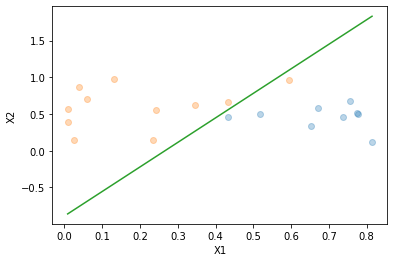

In [7]:
from sklearn.base import BaseEstimator, ClassifierMixin

class Perceptron(BaseEstimator, ClassifierMixin):
    """
    Versão Adaline do Perceptron com limite de iterações,
    treinado em batch, com bias e taxa de aprendizado.
    """
    def __init__(self, training_algrithm=DescidaGradiente()):
        self.w = None
        self.activation = sign
        self.training_algorithm = training_algrithm
    
    @staticmethod
    def includebias(X):
        bias = np.ones((X.shape[0],1))
        Xb = np.concatenate((bias,X), axis=1)
        return Xb

    def fit(self, X, y):
        Xb = Perceptron.includebias(X)
        self.w = self.training_algorithm.getW(Xb, y)
    
    def __pre_activation(self, X):
        Xb = Perceptron.includebias(X)
        return np.matmul(Xb, self.w)

    def predict(self, X):
        a = self.__pre_activation(X)
        ypred = self.activation(a)
        return ypred

perceptron = Perceptron()
perceptron.fit(Xtr, ytr)
print(accuracy(ytr, perceptron.predict(Xtr)))
print(perceptron.w)
plotaHiperplanoDatasetBidimensional(Xtr, ytr, perceptron.w[1:], perceptron.w[0])
print(sum(perceptron.w**2))


In [8]:
Xte, yte = criaDatasetBidimensionalBinárioInclinado(n=1000, slop=slop, intercept=intercept, dummy_features=dummy_features)

0.9


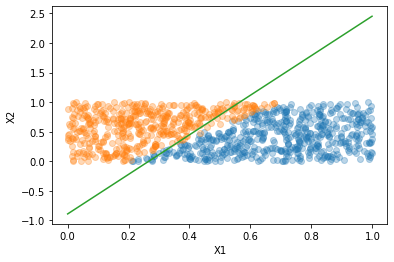

In [9]:
print(accuracy(yte, perceptron.predict(Xte)))
plotaHiperplanoDatasetBidimensional(Xte, yte, perceptron.w[1:], perceptron.w[0])


1.0
[-0.25724672  1.72220464 -0.52091949 -0.2135304  -0.44243977  0.18959625]


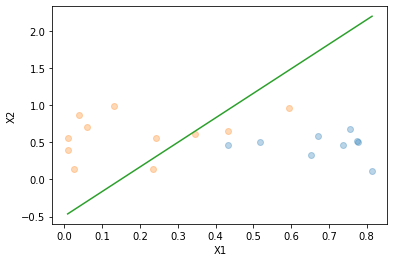

0.914
3.5808167347057895


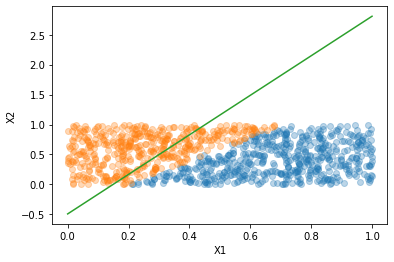

In [10]:
perceptron = Perceptron(training_algrithm=DescidaGradiente(regularization=1))
perceptron.fit(Xtr, ytr)
print(accuracy(ytr, perceptron.predict(Xtr)))
print(perceptron.w)
plotaHiperplanoDatasetBidimensional(Xtr, ytr, perceptron.w[1:], perceptron.w[0])
plt.show()

print(accuracy(yte, perceptron.predict(Xte)))
plotaHiperplanoDatasetBidimensional(Xte, yte, perceptron.w[1:], perceptron.w[0])
print(sum(perceptron.w**2))


In [11]:
perceptron = Perceptron(training_algrithm=DescidaGradiente(regularization=0))
perceptron.fit(Xtr, ytr)
print(accuracy(ytr, perceptron.predict(Xtr)), accuracy(yte, perceptron.predict(Xte)), perceptron.w)

perceptron = Perceptron(training_algrithm=DescidaGradiente(regularization=0.5))
perceptron.fit(Xtr, ytr)
print(accuracy(ytr, perceptron.predict(Xtr)), accuracy(yte, perceptron.predict(Xte)), perceptron.w)

perceptron = Perceptron(training_algrithm=DescidaGradiente(regularization=1))
perceptron.fit(Xtr, ytr)
print(accuracy(ytr, perceptron.predict(Xtr)), accuracy(yte, perceptron.predict(Xte)), perceptron.w)


1.0 0.9 [-0.74855086  2.80781373 -0.86202159 -0.12713451 -0.72611955  0.77566647]
1.0 0.909 [-0.39626214  2.12725162 -0.64388688 -0.20683829 -0.54919336  0.35291298]
1.0 0.914 [-0.25717707  1.72217363 -0.52097678 -0.21352893 -0.44247999  0.18958761]


In [12]:
perceptron = Perceptron(training_algrithm=PseudoInversa(regularization=0))
perceptron.fit(Xtr, ytr)
print(accuracy(ytr, perceptron.predict(Xtr)), accuracy(yte, perceptron.predict(Xte)), perceptron.w)

perceptron = Perceptron(training_algrithm=PseudoInversa(regularization=0.5))
perceptron.fit(Xtr, ytr)
print(accuracy(ytr, perceptron.predict(Xtr)), accuracy(yte, perceptron.predict(Xte)), perceptron.w)

perceptron = Perceptron(training_algrithm=PseudoInversa(regularization=1))
perceptron.fit(Xtr, ytr)
print(accuracy(ytr, perceptron.predict(Xtr)), accuracy(yte, perceptron.predict(Xte)), perceptron.w)


1.0 0.902 [-0.80012654  2.82880653 -0.87555388 -0.09705945 -0.71970387  0.82616513]
1.0 0.909 [-0.39651805  2.12740475 -0.64300555 -0.20725256 -0.54884432  0.35252551]
1.0 0.914 [-0.25728587  1.72221766 -0.52101251 -0.21345976 -0.44246616  0.18969436]
